In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import seaborn as sns

In [38]:
df_anomaly_train = pd.read_csv('csv_files/train.csv')
df_anomaly_test = pd.read_csv('csv_files/test.csv')

#anomaly_inputs = ['request_freq', 'avg_tokens', 'longest_consec', 'var_score']
anomaly_inputs = ['avg_tokens', 'var_score']

model_if = IsolationForest(contamination=0.002, random_state=42)
model_if.fit(df_anomaly_train[anomaly_inputs])

c:\Users\vhage\Documents\Skolarbete\Exjobb\request-analyzer-model\.venv\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.002, random_state=42)

In [39]:
df_anomaly_test['anomaly_score'] = model_if.decision_function(df_anomaly_test[anomaly_inputs])
df_anomaly_test['anomaly'] = model_if.predict(df_anomaly_test[anomaly_inputs])

#This dataframe will only include anomaly score and anomaly label
df_anomaly_score = df_anomaly_test.loc[:,['anomaly_score', 'anomaly']]
df_anomaly_score['user'] = df_anomaly_test['user']
df_a = df_anomaly_score.loc[df_anomaly_score['anomaly']==-1] 
df_a

,anomaly_score,anomaly,user
0,-0.020819,-1,user-1003
1,-0.039718,-1,user-1003
2,-0.018230,-1,user-1003
3,-0.018230,-1,user-1003
4,-0.023937,-1,user-1003
...,...,...,...
2672,-0.018230,-1,user-1004
2673,-0.026545,-1,user-1004
2674,-0.020819,-1,user-1004
2675,-0.020819,-1,user-1004


In [40]:
#To check which users thar are flagged as anomalies
print(set(df_a['user'].to_list()))
#print(df_anomaly_test.loc[df_anomaly_test['user']== ' user-693'])

{' user-1004', ' user-1005', ' user-1003'}


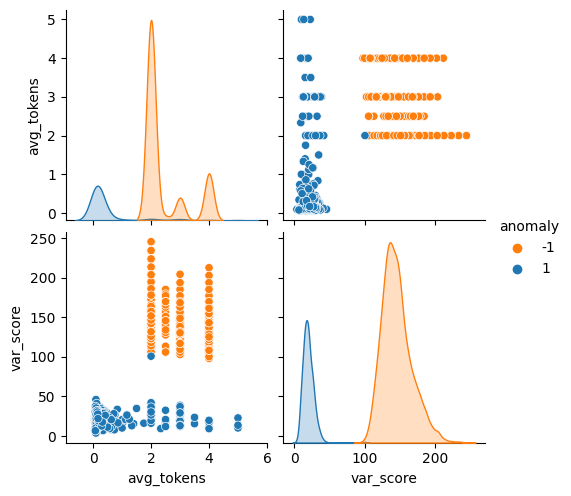

In [41]:
#Plots showcasing the outliers detected by isolation forest
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_anomaly_test, vars=anomaly_inputs, hue='anomaly', palette=palette)